[View in Colaboratory](https://colab.research.google.com/github/stanimman/2015/blob/master/Hello,_Colaboratory.ipynb)

<img height="60px" src="https://colab.research.google.com/img/colab_favicon.ico" align="left" hspace="20px" vspace="5px">

<h1>Welcome to Colaboratory!</h1>
Colaboratory is a free Jupyter notebook environment that requires no setup and runs entirely in the cloud. See our [FAQ](https://research.google.com/colaboratory/faq.html) for more info.

## Getting Started
- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Loading and saving data: Local files, Drive, Sheets, Google Cloud Storage](/notebooks/io.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Using Google Cloud BigQuery](/notebooks/bigquery.ipynb)
- [Forms](/notebooks/forms.ipynb), [Charts](/notebooks/charts.ipynb), [Markdown](/notebooks/markdown_guide.ipynb), & [Widgets](/notebooks/widgets.ipynb)
- [TensorFlow with GPU](/notebooks/gpu.ipynb)
- [TensorFlow with TPU](/notebooks/tpu.ipynb)
- [Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course/): [Intro to Pandas](/notebooks/mlcc/intro_to_pandas.ipynb) & [First Steps with TensorFlow](/notebooks/mlcc/first_steps_with_tensor_flow.ipynb)


## Highlighted Features
### Seedbank

Looking for Colab notebooks to learn from? Check out [Seedbank](https://tools.google.com/seedbank/), a place to discover interactive machine learning examples.

### TensorFlow execution

Colaboratory allows you to execute TensorFlow code in your browser with a single click. The example below adds two matrices.

$\begin{bmatrix}
  1. & 1. & 1. \\
  1. & 1. & 1. \\
\end{bmatrix} +
\begin{bmatrix}
  1. & 2. & 3. \\
  4. & 5. & 6. \\
\end{bmatrix} =
\begin{bmatrix}
  2. & 3. & 4. \\
  5. & 6. & 7. \\
\end{bmatrix}$

In [1]:
!git clone https://github.com/chiphuyen/stanford-tensorflow-tutorials.git

Cloning into 'stanford-tensorflow-tutorials'...
remote: Enumerating objects: 635, done.
remote: Total 635 (delta 0), reused 0 (delta 0), pack-reused 635
Receiving objects: 100% (635/635), 15.85 MiB | 13.29 MiB/s, done.
Resolving deltas: 100% (274/274), done.


In [13]:
!ls stanford-tensorflow-tutorials/2017/data/

arvix_abstracts.txt  friday.jpg       heart.csv
fire_theft.xls	     friday.tfrecord  heart.txt


In [0]:
""" Examples to demonstrate how to write an image file to a TFRecord,
and how to read a TFRecord file using TFRecordReader.
Author: Chip Huyen
Prepared for the class CS 20SI: "TensorFlow for Deep Learning Research"
cs20si.stanford.edu
"""
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

import sys
sys.path.append('..')

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# image supposed to have shape: 480 x 640 x 3 = 921600
IMAGE_PATH = 'stanford-tensorflow-tutorials/2017/data/'

def _int64_feature(value):
  return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

def _bytes_feature(value):
  return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def get_image_binary(filename):
    """ You can read in the image using tensorflow too, but it's a drag
        since you have to create graphs. It's much easier using Pillow and NumPy
    """
    image = Image.open(filename)
    image = np.asarray(image, np.uint8)
    shape = np.array(image.shape, np.int32)
    return shape.tobytes(), image.tobytes() # convert image to raw data bytes in the array.

def write_to_tfrecord(label, shape, binary_image, tfrecord_file):
    """ This example is to write a sample to TFRecord file. If you want to write
    more samples, just use a loop.
    """
    writer = tf.python_io.TFRecordWriter(tfrecord_file)
    # write label, shape, and image content to the TFRecord file
    example = tf.train.Example(features=tf.train.Features(feature={
                'label': _int64_feature(label),
                'shape': _bytes_feature(shape),
                'image': _bytes_feature(binary_image)
                }))
    writer.write(example.SerializeToString())
    writer.close()

def write_tfrecord(label, image_file, tfrecord_file):
    shape, binary_image = get_image_binary(image_file)
    write_to_tfrecord(label, shape, binary_image, tfrecord_file)

def read_from_tfrecord(filenames):
    tfrecord_file_queue = tf.train.string_input_producer(filenames, name='queue')
    reader = tf.TFRecordReader()
    _, tfrecord_serialized = reader.read(tfrecord_file_queue)

    # label and image are stored as bytes but could be stored as 
    # int64 or float64 values in a serialized tf.Example protobuf.
    tfrecord_features = tf.parse_single_example(tfrecord_serialized,
                        features={
                            'label': tf.FixedLenFeature([], tf.int64),
                            'shape': tf.FixedLenFeature([], tf.string),
                            'image': tf.FixedLenFeature([], tf.string),
                        }, name='features')
    # image was saved as uint8, so we have to decode as uint8.
    image = tf.decode_raw(tfrecord_features['image'], tf.uint8)
    shape = tf.decode_raw(tfrecord_features['shape'], tf.int32)
    # the image tensor is flattened out, so we have to reconstruct the shape
    image = tf.reshape(image, shape)
    label = tfrecord_features['label']
    return label, shape, image

def read_tfrecord(tfrecord_file):
    label, shape, image = read_from_tfrecord([tfrecord_file])

    with tf.Session() as sess:
        coord = tf.train.Coordinator()
        threads = tf.train.start_queue_runners(coord=coord)
        label, image, shape = sess.run([label, image, shape])
        coord.request_stop()
        coord.join(threads)
    print(label)
    print(shape)
    plt.imshow(image)
    plt.show() 

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
1
[322 403   3]


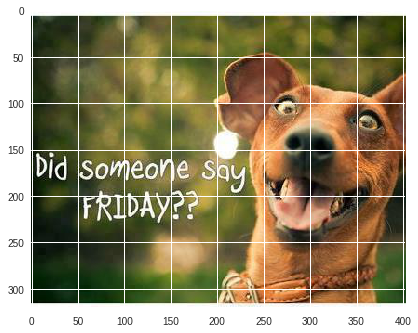

In [12]:
# assume the image has the label Chihuahua, which corresponds to class number 1
for i,j in label_path
    label = i 
    image_file = IMAGE_PATH + 'friday.jpg'
    tfrecord_file = IMAGE_PATH + 'friday.tfrecord'
    write_tfrecord(label, image_file, tfrecord_file)
    read_tfrecord(tfrecord_file)

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.image import imread
import tensorflow as tf
import numpy as np
import sys
import os
import knifey

ModuleNotFoundError: ignored

In [19]:
!pip install mnist

In [0]:
import mnist
#data = MNIST(data_dir="data/MNIST/")

In [25]:
mnist.train_images().shape

(60000, 28, 28)

### GitHub

You can save a copy of your Colab notebook to Github by using File > Save a copy to GitHub…

You can load any .ipynb on GitHub by just adding the path to colab.research.google.com/github/ . For example, [colab.research.google.com/github/tensorflow/models/blob/master/samples/core/get_started/_index.ipynb](https://colab.research.google.com/github/tensorflow/models/blob/master/samples/core/get_started/_index.ipynb) will load [this .ipynb](https://github.com/tensorflow/models/blob/master/samples/core/get_started/_index.ipynb) on GitHub.



### Visualization

Colaboratory includes widely used libraries like [matplotlib](https://matplotlib.org/), simplifying visualization.

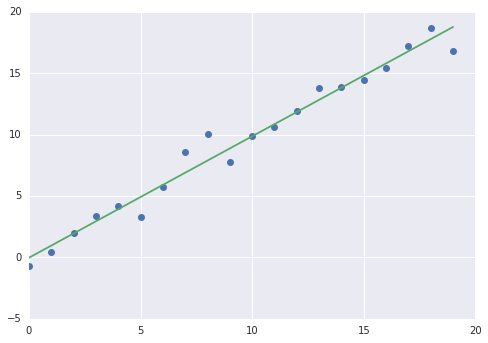

In [0]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(20)
y = [x_i + np.random.randn(1) for x_i in x]
a, b = np.polyfit(x, y, 1)
_ = plt.plot(x, y, 'o', np.arange(20), a*np.arange(20)+b, '-')

Want to use a new library?  `pip install` it at the top of the notebook. Then that library can be used anywhere else in the notebook. For recipes to import commonly used libraries, refer to the [importing libraries example notebook](/notebooks/snippets/importing_libraries.ipynb).

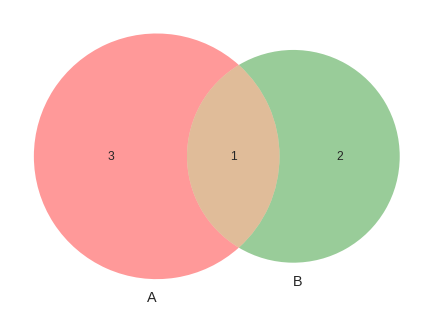

In [0]:
!pip install -q matplotlib-venn

from matplotlib_venn import venn2
_ = venn2(subsets = (3, 2, 1))

### Forms

Forms can be used to parameterize code. See the [forms example notebook](/notebooks/forms.ipynb) for more details.

In [0]:
#@title Examples

text = 'value' #@param 
date_input = '2018-03-22' #@param {type:"date"}
number_slider = 0 #@param {type:"slider", min:-1, max:1, step:0.1}
dropdown = '1st option' #@param ["1st option", "2nd option", "3rd option"]


### Local runtime support

Colab  supports connecting to a Jupyter runtime on your local machine. For more information, see our [documentation](https://research.google.com/colaboratory/local-runtimes.html).